In [1]:
import fenics as f
import matplotlib.pyplot as plt
from models import velocity_field, t_transport_sim, mesh_2d

# remove all axes by default
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False

----------  Running for dT=0 K  ----------*** Warning: Matplotlib plotting backend does not support mesh function of dim 1. Continuing without plotting...

Running for factor=1.0e-03
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 2.931e+04 (tol = 1.000e-09) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 1.924e-13 (tol = 1.000e-09) r (rel) = 6.563e-18 (tol = 1.000e-09)
  Newton solver finished in 1 iterations and 1 linear solver iterations.
Running for factor=1.0e-02
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 1.924e-13 (tol = 1.000e-09) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton solver finished in 0 iterations and 0 linear solver iterations.
Running for factor=1.0e-01
No 

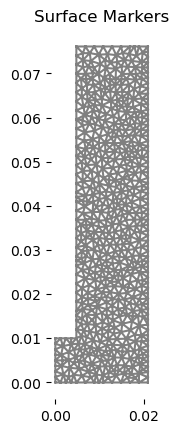

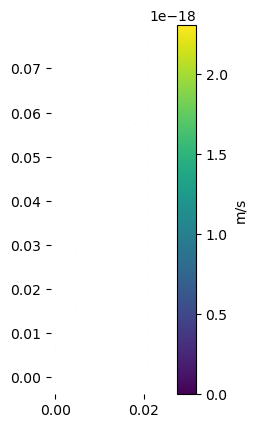

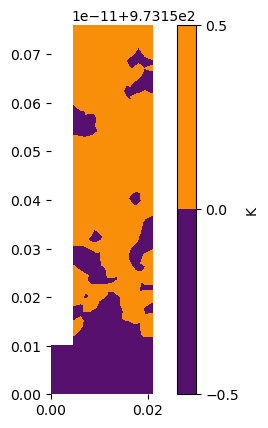

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Solving steady state problem...
Solved problem in 0.00 s


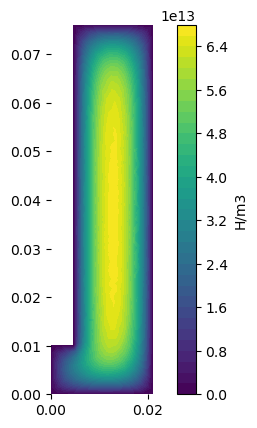

Total surface: 1.48e-02 m2
Total flux: 1.64e+05 H/s/m
Average concentration: 3.89e+13 H/m3
k: 2.85e-07 m/s
----------  Running for dT=1 K  ----------
Running for factor=1.0e-03
Running for factor=1.0e-02
Running for factor=1.0e-01
Running for factor=1.0e+00


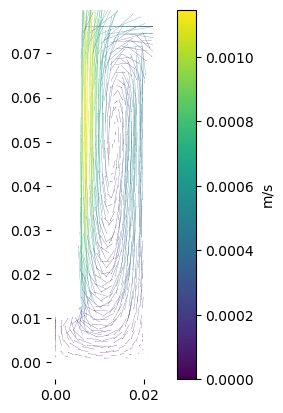

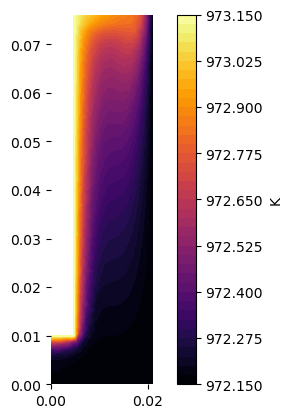

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Solving steady state problem...
Solved problem in 0.00 s


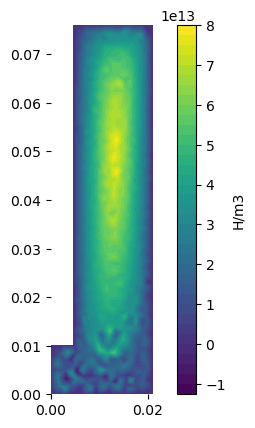

Total surface: 1.48e-02 m2
Total flux: 1.53e+05 H/s/m
Average concentration: 3.31e+13 H/m3
k: 3.12e-07 m/s
----------  Running for dT=2 K  ----------
Running for factor=1.0e-03
Running for factor=1.0e-02
Running for factor=1.0e-01
Running for factor=1.0e+00


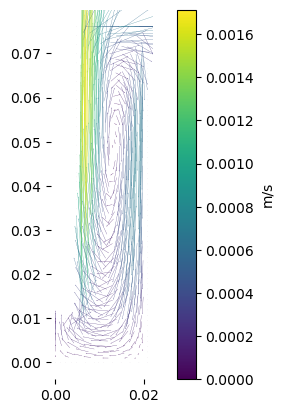

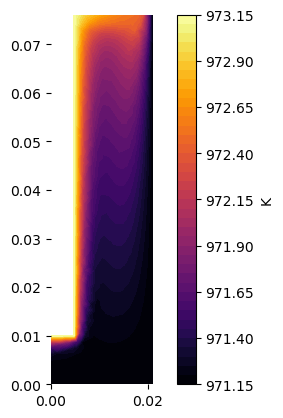

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Solving steady state problem...
Solved problem in 0.00 s


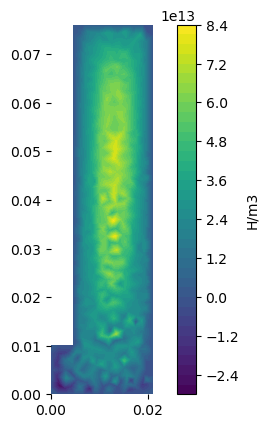

Total surface: 1.48e-02 m2
Total flux: 1.37e+05 H/s/m
Average concentration: 3.10e+13 H/m3
k: 3.00e-07 m/s
----------  Running for dT=10 K  ----------
Running for factor=1.0e-03
Running for factor=1.0e-02
Running for factor=1.0e-01
Running for factor=1.0e+00


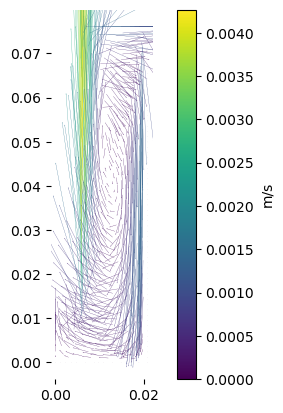

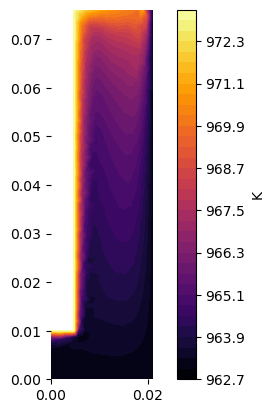

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Solving steady state problem...
Solved problem in 0.00 s


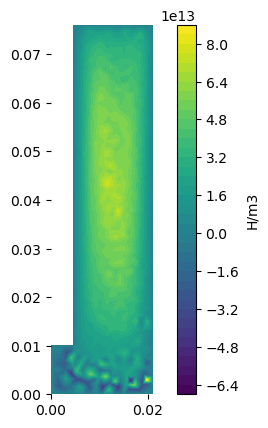

Total surface: 1.48e-02 m2
Total flux: 1.25e+05 H/s/m
Average concentration: 3.07e+13 H/m3
k: 2.75e-07 m/s


Text(0, 0.5, 'Transport Coefficient [m/s]')

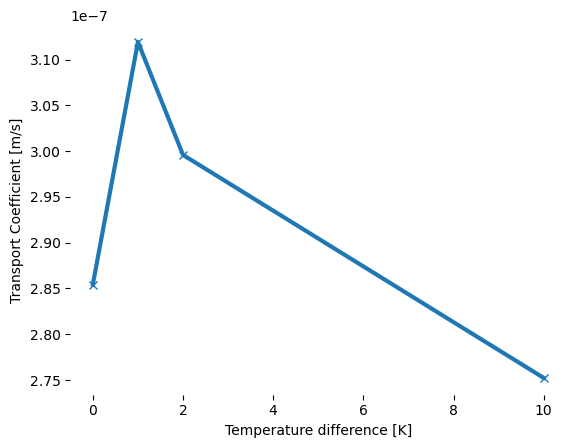

In [2]:
mesh_fenics, volume_markers, surface_markers, correspondance_dict = mesh_2d()

T_hot = 700 + 273.15
dt_array = [0, 1, 2, 10]
k_array = []
for dT in dt_array:
    print(f"----------  Running for dT={dT} K  ----------")
    foldername = f"Results/dt={dT}/"
    T_cold = T_hot - dT
    u, p, T = velocity_field(
        T_cold=T_cold,
        T_hot=T_hot,
        my_mesh=mesh_fenics,
        surface_markers=surface_markers,
        correspondance_dict=correspondance_dict,
    )

    f.XDMFFile(foldername + "temperature_field.xdmf").write_checkpoint(
        T, "temperature", 1, f.XDMFFile.Encoding.HDF5
    )
    f.XDMFFile(foldername + "velocity_field.xdmf").write(u)

    plt.figure()
    # plt.title("Velocity field")
    CS = f.plot(u, scale=1e-3)
    plt.colorbar(CS, label="m/s")
    plt.savefig(f"Results/velocity_dT{dT:.1f}.svg")
    plt.show()

    plt.figure()
    TS = f.plot(T, cmap="inferno")
    plt.colorbar(TS, label="K")
    plt.savefig(f"Results/temperature_dT{dT:.1f}.svg")
    plt.show()

    k, c_avg, flux = t_transport_sim(
        T,
        mesh_fenics,
        u,
        volume_markers=volume_markers,
        surface_markers=surface_markers,
        correspondance_dict=correspondance_dict,
        filename=f"Results/tritium_concentration_dT{dT:.1f}.svg",
    )
    k_array.append(k)

plt.plot(dt_array, k_array, "-x", linewidth=3)
plt.xlabel("Temperature difference [K]")
plt.ylabel("Transport Coefficient [m/s]")

# xdmf_file = XDMFFile("mesh_fencis.xdmf")
# xdmf_file.write(mesh_fenics)
# xdmf_file.close()

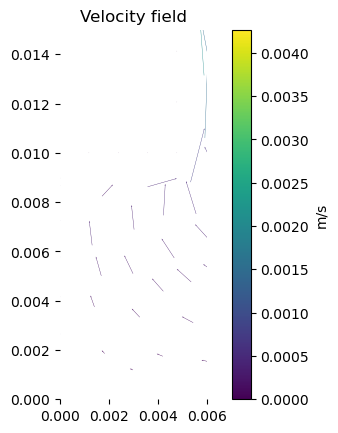

In [3]:
plt.figure()
plt.title("Velocity field")
CS = f.plot(u, scale=2e-3)
plt.colorbar(CS, label="m/s")
plt.xlim(0, 0.006)
plt.ylim(0, 0.015)
plt.show()
